# Import Packages

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta

# Reads in both full files from 01 python process

In [2]:
#Read in the full files created from python previously.
df_hist = pd.read_csv(r'C:\Users\Brian\01_Historical_Data.csv')
df_info = pd.read_csv(r'C:\Users\Brian\01_Info_Data.csv')

# Creates 1 month rolling min and max

In [3]:
#Adds Monthly Historical Columns
df_hist['Monthly_High'] = df_hist['High'].rolling(21).max()
df_hist['Monthly_Low'] = df_hist['Low'].rolling(21).min()
#Adds Annual Historical Columns
df_hist['Annual_High'] = df_hist['High'].rolling(252).max()
df_hist['Annual_Low'] = df_hist['Low'].rolling(252).min()

# List of tickers select by the top 5 scores of the 02 sql process

In [4]:
#Top 5 tickers from sql process listed here.
tickers = ['CWCO','CRNX','IMVT','CELH','CALM']

# Combines and filters dataframes down

In [5]:
#Filter down to correct colmns
df_hist = df_hist[['Ticker','Date','SMA_50', 'Annual_High', 'Annual_Low','Monthly_High','Monthly_Low']]
df_info = df_info[['symbol','currentPrice']]

#Combines the data frames
df_plot = df_hist.merge(df_info, how='inner', left_on='Ticker', right_on='symbol')

#Isolates only tickers beig used
df_plot = df_plot[df_plot[df_plot.columns[0]].isin(tickers)]

# Final population for graphing

In [6]:
#Filters down and reorders columns after database merge.
df_plot = df_plot[['Ticker', 'Date', 'currentPrice','SMA_50', 'Annual_High', 'Annual_Low', 'Monthly_High',
          'Monthly_Low']]

In [7]:
df_plot['Date'] = pd.to_datetime(df_plot['Date'])

print(df_plot)

        Ticker       Date  currentPrice     SMA_50  Annual_High  Annual_Low  \
459931    CALM 2018-12-12        49.235  41.578325    45.549999      12.780   
459932    CALM 2018-12-13        49.235  41.613073    45.830002      12.780   
459933    CALM 2018-12-14        49.235  41.628775    45.830002      12.780   
459934    CALM 2018-12-17        49.235  41.633884    45.830002      12.780   
459935    CALM 2018-12-18        49.235  41.629287    45.830002      12.780   
...        ...        ...           ...        ...          ...         ...   
1364901   IMVT 2023-09-21        39.110  21.834800    25.128000       4.260   
1364902   IMVT 2023-09-22        39.110  21.837200    25.128000       4.260   
1364903   IMVT 2023-09-25        39.110  21.828000    25.128000       4.260   
1364904   IMVT 2023-09-26        39.110  22.164600    41.720001       4.260   
1364905   IMVT 2023-09-27        39.110  22.456100    44.189999       4.495   

         Monthly_High  Monthly_Low  
459931      45

# Creates Graph for Monthly

In [8]:
def monthly_graph(stock):

    stock = tickers[stock]

    #Isolates Ticker Passed in
    df_plot_single = df_plot[df_plot['Ticker'] == stock]

    df_plot_single = df_plot_single.reset_index()

    #Filters down Dataframe frequency
    i = 0
    graph_population = []

    while i < len(df_plot_single):
        i+=20
        list = graph_population.append(i)

    df_plot_single = df_plot_single[df_plot_single.index.isin(graph_population)]

    #Creates the lines
    plt.plot(df_plot_single['Date'],df_plot_single['currentPrice'], 'b-',label='currentPrice') 
    plt.plot(df_plot_single['Date'],df_plot_single['Monthly_High'], 'c-',label='monthlyHigh') 
    plt.plot(df_plot_single['Date'],df_plot_single['Monthly_Low'], 'g-',label='monthlyLow') 

    #Lables
    plt.xlabel('Date')
    plt.ylabel('Price')

    #Creates list of quarterly dates
    current_date = date.today()
    future_date = current_date - relativedelta(days=1825)
    date_scale = pd.date_range(future_date,freq="Q",periods=20)#.to_period('Q')

    #Updates Date Ticks
    plt.xticks(date_scale,rotation=90)

    #Title
    plt.title(stock, fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

    #Grid Lines
    plt.grid(color='black', linestyle='--',linewidth=1)
    
    #Add Legend
    plt.legend()

    #Shows the lines
    plt.show()


In [9]:
def annual_graph(stock):

    stock = tickers[stock]

    #Isolates Ticker Passed in
    df_plot_single = df_plot[df_plot['Ticker'] == stock]

    df_plot_single = df_plot_single.reset_index()

    #Filters down Dataframe frequency
    i = 0
    graph_population = []

    while i < len(df_plot_single):
        i+=20
        list = graph_population.append(i)

    df_plot_single = df_plot_single[df_plot_single.index.isin(graph_population)]

    #Creates the lines
    plt.plot(df_plot_single['Date'],df_plot_single['currentPrice'], 'b-',label='currentPrice') 
    plt.plot(df_plot_single['Date'],df_plot_single['Annual_High'], 'c-',label='annualHigh') 
    plt.plot(df_plot_single['Date'],df_plot_single['Annual_Low'], 'g-',label='annualLow') 

    #Lables
    plt.xlabel('Date')
    plt.ylabel('Price')

    #Creates list of quarterly dates
    current_date = date.today()
    future_date = current_date - relativedelta(days=1825)
    date_scale = pd.date_range(future_date,freq="Q",periods=20)#.to_period('Q')

    #Updates Date Ticks
    plt.xticks(date_scale,rotation=90)

    #Title
    plt.title(stock, fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

    #Grid Lines
    plt.grid(color='black', linestyle='--',linewidth=1)
    
    #Adds Legend
    plt.legend()

    #Shows the lines
    plt.show()

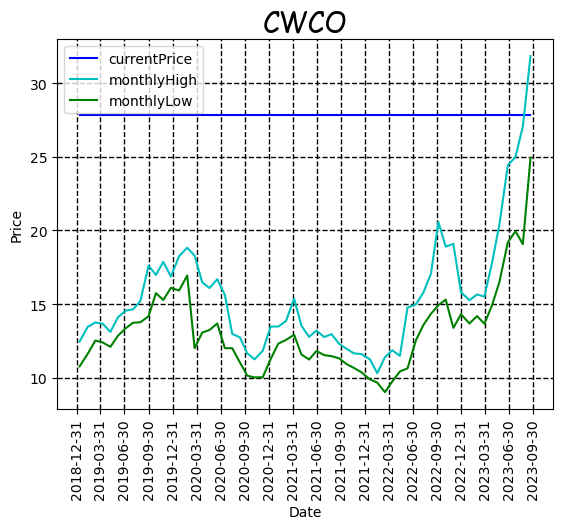

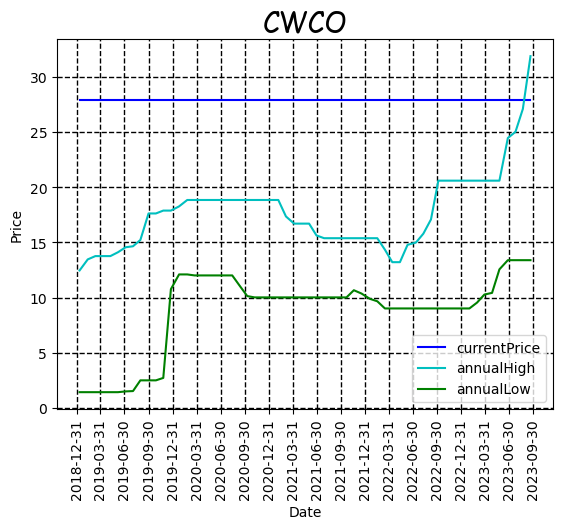

In [10]:
monthly_graph(0)
annual_graph(0)

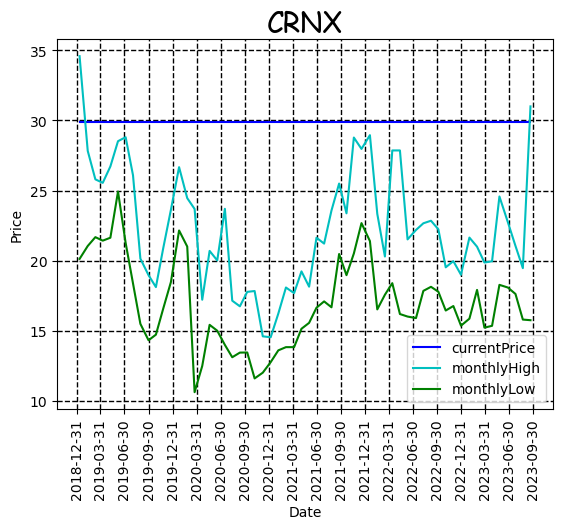

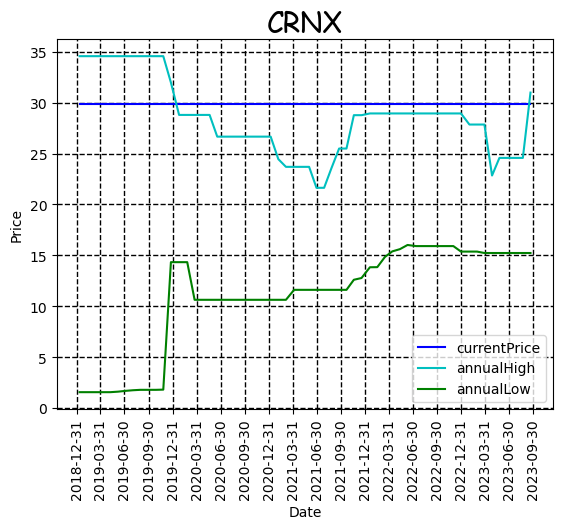

In [11]:
monthly_graph(1)
annual_graph(1)

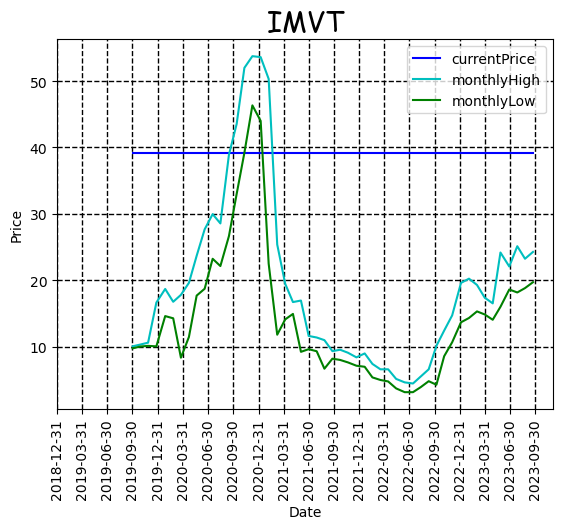

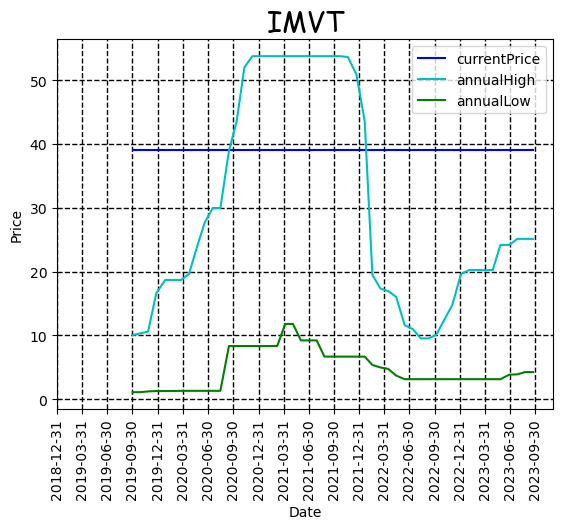

In [12]:
monthly_graph(2)
annual_graph(2)

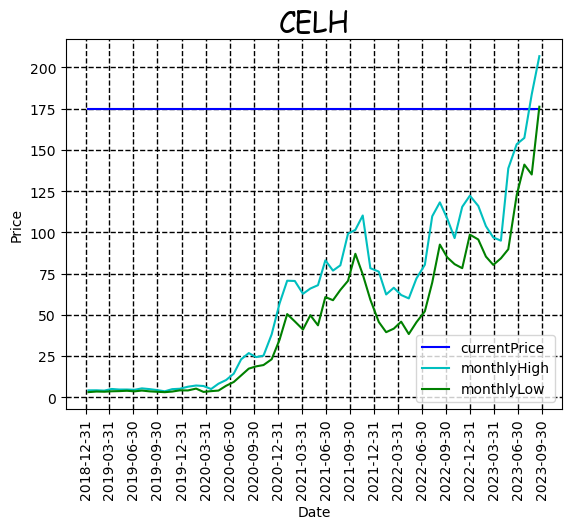

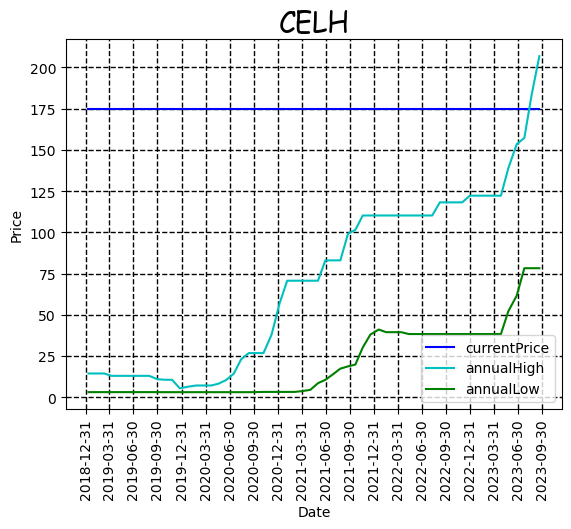

In [13]:
monthly_graph(3)
annual_graph(3)

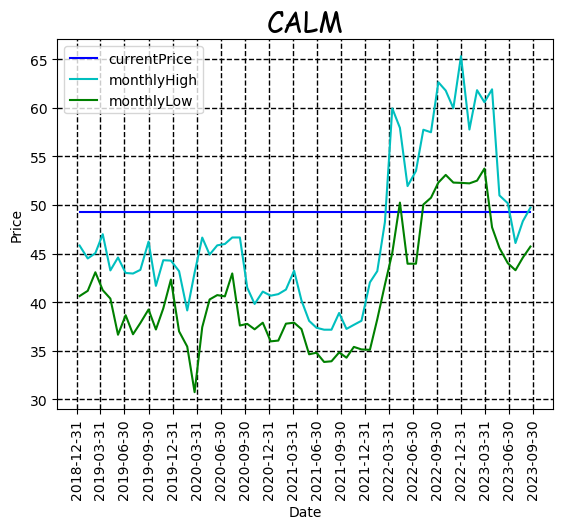

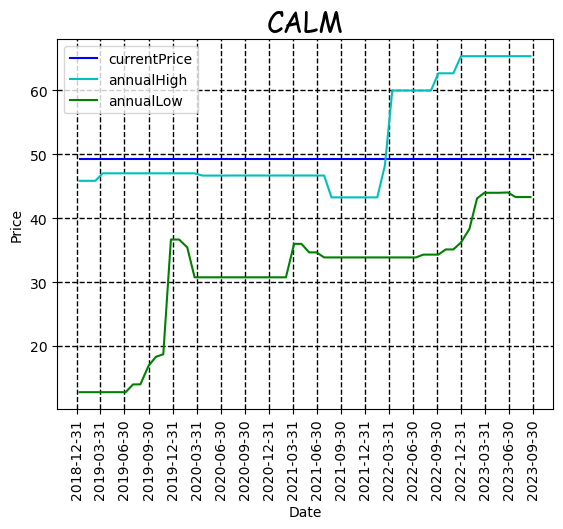

In [14]:
monthly_graph(4)
annual_graph(4)